# Zad 1 - Metoda Boxa-Mulera

In [75]:
using Plots
using Distributions
#using Stats
using StatPlots

$X_i \sim N(0,1)$
$$ X_1 = \sqrt{-2\ln U_1}\sin 2\pi U_2 $$
$$ X_2 = \sqrt{-2\ln U_1}\cos 2\pi U_2 $$

Wtedy
$Y_i = \sigma X_i+\mu \sim N(\mu,\sigma^2)$

In [22]:
N₁(μ,σ²)=begin
    σ=sqrt(σ²)
    U₁=rand()
    U₂=rand()
    x₁=sqrt(-2*log(U₁))*sin(2*π*U₂)
    x₂=sqrt(-2*log(U₁))*cos(2*π*U₂)
    return (σ*x₁+μ, σ*x₂+μ)
end

N₁ (generic function with 1 method)

In [5]:
N(1,1)

(1.0028900046409404, 1.153852699498824)

# Zad 2 - metoda biegunowa

$V_i\sim U(-1,1)$

$R^2=V_1^2+V_2^2$

$X_i=\sqrt{\dfrac{\ln R^2}{R^2}}V_i$

In [38]:
N₂(μ,σ²)=begin
    σ=sqrt(σ²)
    V₁=2*rand()-1
    V₂=2*rand()-1
    R²=V₁^2+V₂^2
    while R²>1
       V₁=2*rand()-1
        V₂=2*rand()-1
        R²=V₁^2+V₂^2 
    end
    
    A=sqrt(-2*log(R²)/R²)
    X₁=A*V₁
    X₂=A*V₂
    
    return σ*X₁+μ#, σ*X₂+μ
end
    

N₂ (generic function with 1 method)

# Porównanie wyników

## Czas działania

In [20]:
using BenchmarkTools

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1317


In [43]:
@btime N₁(1,2)

  110.919 ns (0 allocations: 0 bytes)


(0.36466276987169477, 3.7540305182925233)

In [76]:
@btime N₂(1,2)

  73.717 ns (0 allocations: 0 bytes)


-0.05155913093032116

## qqplot

In [69]:
Δ=1e-4
x₁=quantile.(Normal(1,1),Δ:Δ:1);
y₁=sort([N₁(1,1)[1] for i in Δ:Δ:1]);

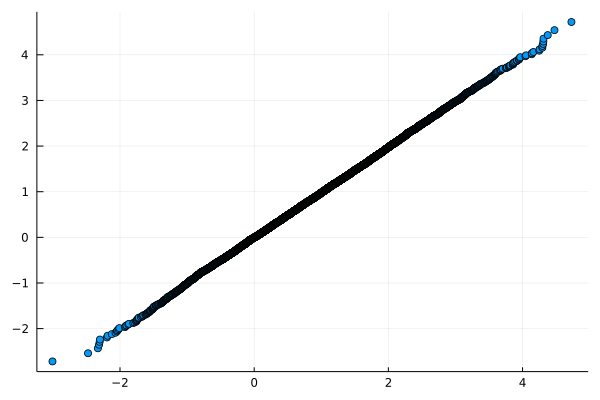

In [70]:
scatter(y₁,x₁,leg=false)

In [73]:
Δ=1e-4
x₂=quantile.(Normal(1,1),Δ:Δ:1);
y₂=sort([N₂(1,1)[1] for i in Δ:Δ:1]);

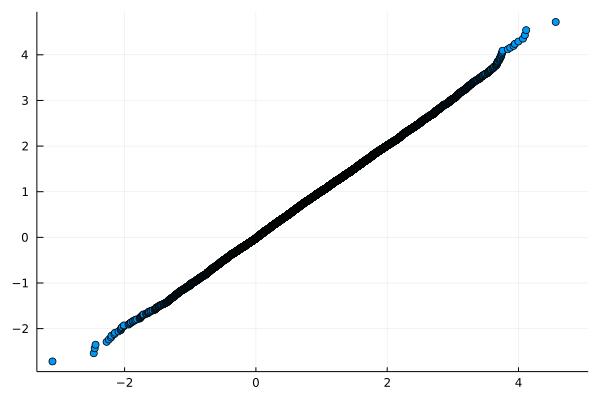

In [74]:
scatter(y₂,x₂,leg=false)

# Nic

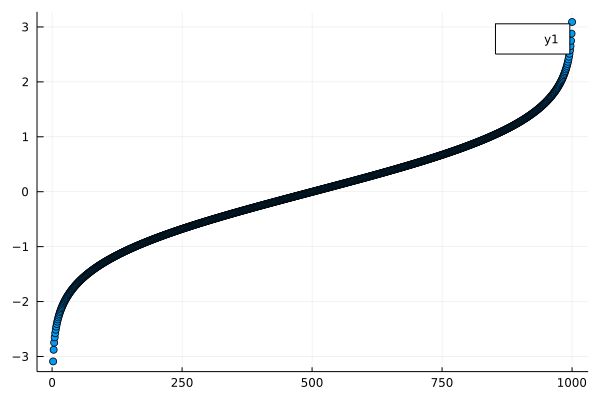

In [36]:
scatter(quantile.(Normal(),0:1e-3:1),)